In [1]:
#1-modelisation

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
#from imblearn.under_sampling import ClusterCentroid

from imblearn.metrics import classification_report_imbalanced, geometric_mean_score

df=pd.read_csv(r"C:\Users\magal\Documents\Documents Magali\Formations\Formation machine learing\DataScientist\projet\code\derniere_base.csv", sep=';')


df["Note_client"] = df["Note_client"].replace(to_replace=[1, 2, 3, 4, 5], value=[1, 1, 2, 2, 2])





In [5]:
################### variable négation ----Ne pas faire tourner très long , utiliser le fichier ou sont stockés les resulats de cette partie - derniere_base.csv - ################################

##################################Variable NEGATION #################################################

#rajout de la negation non pris en compte precedement seult sur le titre
# import pandas as pd
# import re


# def custom_tokenize(text):
#     # Compteur pour les négations
#     negation_count = 0
    
#     # Remplacer les formes de négation par un symbole spécial et compter les occurrences
#     def count_negation(match):
#         nonlocal negation_count
#         negation_count += 1
#         return f'NEGATION_{match.group(1)}'
    
#     # Mise à jour de l'expression régulière pour inclure "non"
#     text = re.sub(r'\b(ne|n\'|pas|jamais|plus|non)\b', count_negation, text)
    
#     # Tokeniser le texte
#     tokens1 = re.findall(r'\b\w+\b|NEGATION\w+', text)
    
#     # Remplacer le symbole spécial par le mot de négation
#     tokensneg = [token.replace("NEGATION_", "") for token in tokens1]
    
#     return tokens1, negation_count

# # Appliquer la fonction à chaque ligne du DataFrame
# def process_row(row):
#     combined_text =  row['Titre_commentaire']
#     #combined_text = row['Commentaire'] + " " + row['Titre_commentaire']
#     tokens, negation_count = custom_tokenize(combined_text)
    
#     # Déterminer si le texte est négatif
#     negatif = 1 if negation_count > 0 else 0  #negatif = oui=1
    
#     return pd.Series([negatif, negation_count])

# # Appliquer la fonction process_row à chaque ligne et créer de nouvelles colonnes
# df[['negatif', 'nbneg']] = df.apply(process_row, axis=1)

# # Afficher le DataFrame modifié
# display(df.head())


,Nombre_avis_client,Note_client,Titre_commentaire,Commentaire,Lemmes,Lemmes_titre_commentaire,class_note,class_nbavis,nbre_mots,nbre_phrases,class_longueur_mot,class_pt_exclam,class_sentiment,emoticones,sentimentfr,Nombre_Émoticônes,negatif,nbneg
0,6,5,très bon support technique,"bonjour, j'ai acheté ma première configurztion...","['acheté', 'premi', 'configurztion', 'chez', '...","['support', 'technique']",satisfait,4-123,66,2,long,E0,Positif,Neutre,0.176000,0,0,0
1,2,5,site clair et infos constructives,je partais à la recherche de mon premier ecran...,"['partais', 'recherche', 'premier', 'ecran', '...","['site', 'clair', 'infos', 'info', 'constructi...",satisfait,2-3,58,3,long,E1,Positif,Neutre,0.197813,0,0,0
2,2,5,j'ai récemment eu un problème avec ma…,j'ai récemment eu un problème avec ma carte gr...,"['récemment', 'probl', 'carte', 'graphique', '...","['récemment', 'probl']",satisfait,2-3,45,3,long,E0,Neutre,Neutre,0.000000,0,0,0
3,2,5,ras comme toujours,je passe par materiel.net car historiquement j...,"['passe', 'materiel', 'historiquement', 'sais'...","['comme', 'toujours']",satisfait,2-3,77,2,long,E0,Positif,Neutre,0.087500,0,0,0
4,1,5,cela fait des années que j'achète sur…,cela fait des années que j'achète sur votre si...,"['années', 'site', 'matériel', 'seule', 'fois'...",['années'],satisfait,1,49,3,long,E0,Positif,Neutre,0.284000,0,0,0


In [ ]:
################################################################################## variable sentiment 2 ###################################################################################################################
#                                                    Ne pas faire tourner très long, utiliser le fichier ou sont stockés les resulats de cette partie - derniere_base.csv -                                               #
#                                                                                       Variable NLP

########################################################################################################################################################################################################################## 


# import torch
# import pandas as pd
# from transformers import BertTokenizer, BertForSequenceClassification

# # Étape 1 : Charger le modèle et le tokenizer
# model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
# tokenizer = BertTokenizer.from_pretrained(model_name)
# model = BertForSequenceClassification.from_pretrained(model_name)

# # Assurez-vous que le modèle est en mode évaluation
# model.eval()

# # Étape 3 : Fonction pour prédire le sentiment
# def predict_sentiment(text):
#     inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
#     with torch.no_grad():  # Pas besoin de calculer les gradients
#         outputs = model(**inputs)
#     logits = outputs.logits
#     sentiment = torch.argmax(logits, dim=1).item()  # Obtenir l'indice de la classe avec la plus haute probabilité
#     return sentiment+1    #modifier les classes de 1 à 5

# # Étape 4 : Appliquer la fonction à chaque ligne du DataFrame
# def process_row(row):
#     combined_text = row['Commentaire'] + " " + row['Titre_commentaire']
#     return predict_sentiment(combined_text)

# # Supposons que 'df' est votre DataFrame
# df['sentiment_dl'] = df.apply(process_row, axis=1)

# # Étape 5 : Afficher le DataFrame avec les sentiments
# display(df)
# #df.to_csv(r"C:\Users\magal\Documents\Documents Magali\Formations\Formation machine learing\DataScientist\projet\code\derniere_base.csv", sep=';', index=False)

,Nombre_avis_client,Note_client,Titre_commentaire,Commentaire,Lemmes,Lemmes_titre_commentaire,class_note,class_nbavis,nbre_mots,nbre_phrases,class_longueur_mot,class_pt_exclam,class_sentiment,emoticones,sentimentfr,Nombre_Émoticônes,negatif,nbneg,sentiment_dl
0,6,5,très bon support technique,"bonjour, j'ai acheté ma première configurztion...","['acheté', 'premi', 'configurztion', 'chez', '...","['support', 'technique']",satisfait,4-123,66,2,long,E0,Positif,Neutre,0.176000,0,0,0,5
1,2,5,site clair et infos constructives,je partais à la recherche de mon premier ecran...,"['partais', 'recherche', 'premier', 'ecran', '...","['site', 'clair', 'infos', 'info', 'constructi...",satisfait,2-3,58,3,long,E1,Positif,Neutre,0.197813,0,0,0,5
2,2,5,j'ai récemment eu un problème avec ma…,j'ai récemment eu un problème avec ma carte gr...,"['récemment', 'probl', 'carte', 'graphique', '...","['récemment', 'probl']",satisfait,2-3,45,3,long,E0,Neutre,Neutre,0.000000,0,0,0,5
3,2,5,ras comme toujours,je passe par materiel.net car historiquement j...,"['passe', 'materiel', 'historiquement', 'sais'...","['comme', 'toujours']",satisfait,2-3,77,2,long,E0,Positif,Neutre,0.087500,0,0,0,4
4,1,5,cela fait des années que j'achète sur…,cela fait des années que j'achète sur votre si...,"['années', 'site', 'matériel', 'seule', 'fois'...",['années'],satisfait,1,49,3,long,E0,Positif,Neutre,0.284000,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33558,4,5,commande samsung s,"commande reçue rapidement, téléphone opération...","['commande', 'rapidement', 'téléphone', 'opéra...","['commande', 'samsung']",satisfait,4-123,12,2,Court,E1,Positif,Neutre,0.050000,0,0,0,5
33559,2,5,livraison rapide état du téléphone …,livraison rapide état du téléphone nickel rasj...,"['livraison', 'rapide', 'état', 'téléphone', '...","['livraison', 'rapide', 'état', 'téléphone']",satisfait,2-3,9,1,Très court,E0,Positif,Neutre,0.275000,0,0,0,5
33560,1,4,téléphone reçu dans des délais très …,téléphone reçu dans des délais très rapides. q...,"['téléphone', 'délais', 'rapides', 'quelques',...","['téléphone', 'délais']",satisfait,1,33,3,moyen,E0,Positif,Neutre,0.100000,0,0,0,4
33561,1,5,i phone s,"envoi impeccable, délai respecté, produit état...","['envoi', 'impeccable', 'délai', 'respecté', '...",['phone'],satisfait,1,11,1,Court,E0,Positif,Neutre,0.416667,0,0,0,5


                    Nombre_avis_client  Note_client  nbre_mots  nbre_phrases  \
Nombre_avis_client            1.000000     0.025463   0.027012      0.024082   
Note_client                   0.025463     1.000000  -0.412981     -0.308546   
nbre_mots                     0.027012    -0.412981   1.000000      0.699206   
nbre_phrases                  0.024082    -0.308546   0.699206      1.000000   
sentimentfr                  -0.000870     0.323044  -0.236993     -0.139834   
Nombre_Émoticônes            -0.002015    -0.005252   0.026240      0.035355   
negatif                      -0.004575    -0.261782   0.112069      0.068262   
nbneg                        -0.006388    -0.271312   0.125270      0.079210   
sentiment_dl                  0.021500     0.738754  -0.446124     -0.297346   

                    sentimentfr  Nombre_Émoticônes   negatif     nbneg  \
Nombre_avis_client    -0.000870          -0.002015 -0.004575 -0.006388   
Note_client            0.323044          -0.005252 

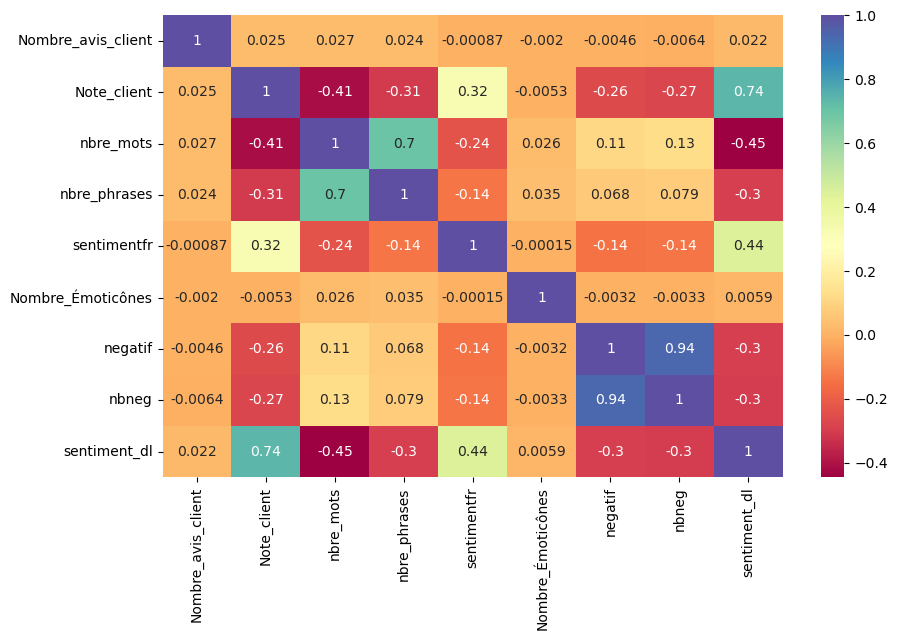

In [ ]:

#visualisation avec une heatmap


var_num = df.select_dtypes(include = ['int','float'])
#var_num=var_num.drop(["Nombre_avis_client","sentimentfr"], axis=1)

#corrélations de toutes les variables quantitatives de df.
cor = var_num.corr()
print(cor)

fig = plt.subplots(figsize = (10,6))
sns.heatmap(cor, annot = True, cmap = "Spectral")
plt.show()



In [ ]:
#2-##################################################################### 2-Separation- Endodage- Normalisation -equilibre echantillon#####################################################
# Séparation l'ensemble d'entraînement, de validation et de test
X = df.drop(['Note_client',"Commentaire","Titre_commentaire","Nombre_avis_client","nbre_mots",'sentimentfr', 'Nombre_Émoticônes'],axis=1)
y = df['Note_client']


# Séparation des données en ensembles d'entraînement(80%), de validation(10%) et de test(10%)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# verif taille des 3 ensembles
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

# Encodage indépendamment des 3 ensembles

X_numerique_train= X_train[["nbre_phrases","nbneg"]]
X_numerique_test= X_test[["nbre_phrases","nbneg"]]
X_numerique_val= X_val[["nbre_phrases","nbneg"]]

#X_numerique = df_train[['nbre_mots',"nbre_phrases" ,'sentimentfr', 'Nombre_Émoticônes']]

# Encodage la variable cible avec labelEncoder (pour des variables ordinales)

le = LabelEncoder()
y_train= le.fit_transform(y_train)+1
y_test = le.transform(y_test)+1
y_val= le.transform(y_val)+1


############################################## Vérif   ########################
# Récupération des indices de X_test pour relier avec le DataFrame d'origine
indices_test = X_test.index

# Récupération des notes du client à partir du DataFrame original pour les indices de X_test
notes_clients10 = df.loc[indices_test, 'Note_client'].values


 #Création d'un DataFrame avec les valeurs de y_test et les valeurs de X_test
df_test_results10 = pd.DataFrame({
    'Index': indices_test,
    'Predicted_Note_Client': y_test,
    'Note_Client_Original': notes_clients10 
})

# Ajout des colonnes de X_test au DataFrame
for column in X_test.columns:
    df_test_results10[column] = X_test[column].values

# Réinitialisation de l'index pour un affichage plus propre
df_test_results10.reset_index(drop=True, inplace=True)

# Affichage des résultats
print(df_test_results10.head())

#df_test_results10.to_csv(r"C:\Users\magal\Documents\Documents Magali\Formations\Formation machine learing\DataScientist\projet\code\verif.csv", sep=';', index=False, encoding='utf-8-sig')


####################################################################################

#encodage des autres variables categorielles

X_categorielle_train=X_train[['class_longueur_mot',"class_pt_exclam","emoticones","class_nbavis","sentiment_dl","class_sentiment"]]  
X_categorielle_encoded_train = pd.get_dummies(X_categorielle_train, drop_first=True)
X_categorielle_encoded_train=X_categorielle_encoded_train.astype(int)


X_categorielle_test=X_test[['class_longueur_mot',"class_pt_exclam","emoticones","class_nbavis","sentiment_dl","class_sentiment"]]
X_categorielle_encoded_test = pd.get_dummies(X_categorielle_test, drop_first=True)
X_categorielle_encoded_test=X_categorielle_encoded_test.astype(int)

X_categorielle_val=X_val[['class_longueur_mot',"class_pt_exclam","emoticones","class_nbavis","sentiment_dl","class_sentiment"]]
X_categorielle_encoded_val = pd.get_dummies(X_categorielle_val, drop_first=True)
X_categorielle_encoded_val=X_categorielle_encoded_val.astype(int)


##Application de la vectorisation sur les données textuelles

# Pour l'ensemble d'entraînement
vectorizer = TfidfVectorizer()
X_texte_train = X_train['Lemmes'] + ' ' + X_train['Lemmes_titre_commentaire']  # Combiner les colonnes texte
X_text_vectorized_train = vectorizer.fit_transform(X_texte_train)

# Pour l'ensemble de test
X_texte_test = X_test['Lemmes'] + ' ' + X_test['Lemmes_titre_commentaire']  # Combiner les colonnes texte
X_text_vectorized_test = vectorizer.transform(X_texte_test)  # Utilisez transform au lieu de fit_transform

# Pour l'ensemble de val
X_texte_val = X_val['Lemmes'] + ' ' + X_val['Lemmes_titre_commentaire']  # Combiner les colonnes texte
X_text_vectorized_val = vectorizer.transform(X_texte_val)  # Utilisez transform au lieu de fit_transform


from scipy.sparse import csr_matrix
from scipy.sparse import hstack

# Transformer  en matrice creuse pour gagner du temps de calcul
X_categorielle_encoded_train_sparse = csr_matrix(X_categorielle_encoded_train)
X_numerique_train_sparse = csr_matrix(X_numerique_train)
X_text_vectorized_train_sparse = csr_matrix(X_text_vectorized_train)

X_numerique_val_sparse = csr_matrix(X_numerique_val)
X_categorielle_encoded_val_sparse = csr_matrix(X_categorielle_encoded_val)
X_text_vectorized_val_sparse = csr_matrix(X_text_vectorized_val)

X_numerique_test_sparse = csr_matrix(X_numerique_test)
X_categorielle_encoded_test_sparse = csr_matrix(X_categorielle_encoded_test)
X_text_vectorized_test_sparse = csr_matrix(X_text_vectorized_test)


# Combiner les caractéristiques textuelles et numériques pour 3 ensembles
X_train_combined = hstack([X_text_vectorized_train_sparse, X_categorielle_encoded_train_sparse, X_numerique_train_sparse])
X_val_combined = hstack([X_text_vectorized_val_sparse,X_categorielle_encoded_val_sparse, X_numerique_val_sparse])
X_test_combined = hstack([X_text_vectorized_test_sparse,X_categorielle_encoded_test_sparse, X_numerique_test_sparse])

# Normalisation des 3 ensembles
scaler = StandardScaler(with_mean=False)  # with_mean=False car TF-IDF peut avoir des valeurs nulles
X_train_scaled = scaler.fit_transform(X_train_combined)
X_val_scaled = scaler.transform(X_val_combined)
X_test_scaled = scaler.transform(X_test_combined)

from imblearn.over_sampling import SMOTE
# Reequilibrage avec SMOTE uniquement sur l'ensemble d'entraînement

smote = SMOTE(random_state=42, sampling_strategy='auto')
X_train_equilibre, y_train_equilibre = smote.fit_resample(X_train_scaled, y_train)
print('Classes échantillon Oversampling SMOTE :', dict(pd.Series(y_train_equilibre).value_counts()))



(26850, 12)
(3357, 12)
(3356, 12)
   Index  Predicted_Note_Client  Note_Client_Original  \
0   7506                      2                     2   
1  27833                      1                     1   
2  31923                      1                     1   
3  11723                      2                     2   
4   4348                      2                     2   

                                              Lemmes  \
0  ['matériel', 'conforme', 'commande', 'service'...   
1  ['voil', 'bient', 'mois', 'commandé', 'apple',...   
2  ['achat', 'effectué', 'jours', 'livraison', 'p...   
3  ['procédure', 'remplacement', 'identique', 'pu...   
4  ['site', 'clair', 'données', 'compl', 'achat',...   

                        Lemmes_titre_commentaire   class_note class_nbavis  \
0                                             []    satisfait            1   
1     ['deuxi', 'commande', 'toujours', 'colis']  insatisfait            1   
2                                     ['éviter']  in

In [ ]:
# 3-Application d'un modèle de classification RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialiser le modèle
model = RandomForestClassifier(random_state=42)

# Entraînement du modèle
model.fit(X_train_equilibre, y_train_equilibre)

# Prédictions sur l'ensemble du test
y_test_pred = model.predict(X_test_scaled)

# Prédictions sur l'ensemble de validation


# Évaluation du modèle
print("Classification Report sur l'ensemble de test:\n", classification_report(y_test, y_test_pred))
print("Accuracy sur l'ensemble de test:", accuracy_score(y_test, y_test_pred))
cmsm = pd.crosstab(y_test, y_test_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
display(cmsm)
print("----------------------------")

# print("Classification Report sur l'ensemble de validation:\n", classification_report(y_val, y_val_pred))
# print("Accuracy sur l'ensemble de validation:", accuracy_score(y_val, y_val_pred))

Classification Report sur l'ensemble de test:
               precision    recall  f1-score   support

           1       0.85      0.68      0.76       319
           2       0.97      0.99      0.98      3038

    accuracy                           0.96      3357
   macro avg       0.91      0.83      0.87      3357
weighted avg       0.96      0.96      0.96      3357

Accuracy sur l'ensemble de test: 0.958593982722669


Classe prédite,1,2
Classe réelle,,
1,217,102
2,37,3001


----------------------------


In [5]:
#4-Application d'un modèle de classification LightGBM

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import lightgbm as lgb
from lightgbm import LGBMClassifier

# Initialiser le modèle
model = LGBMClassifier()


# Entraînement du modèle
model.fit(X_train_equilibre, y_train_equilibre)

# Prédictions sur l'ensemble du test
y_test_pred = model.predict(X_test_scaled)

# Prédictions sur l'ensemble de validation


# Évaluation du modèle
print("Classification Report sur l'ensemble de test:\n", classification_report(y_test, y_test_pred))
print("Accuracy sur l'ensemble de test:", accuracy_score(y_test, y_test_pred))
cmsm = pd.crosstab(y_test, y_test_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
display(cmsm)
print("----------------------------")

c:\Users\magal\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Le fichier spécifié est introuvable
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\magal\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\magal\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\magal\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\magal\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(e

[LightGBM] [Info] Number of positive: 24300, number of negative: 24300
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.106298 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 237959
[LightGBM] [Info] Number of data points in the train set: 48600, number of used features: 4652
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Classification Report sur l'ensemble de test:
               precision    recall  f1-score   support

           1       0.82      0.78      0.80       319
           2       0.98      0.98      0.98      3038

    accuracy                           0.96      3357
   macro avg       0.90      0.88      0.89      3357
weighted avg       0.96      0.96      0.96      3357

Accuracy sur l'ensemble de test: 0.9624664879356568


Classe prédite,1,2
Classe réelle,,
1,249,70
2,56,2982


----------------------------


In [6]:

# 5-Optimisation pour modele LGBMClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb
from lightgbm import LGBMClassifier
import pandas as pd

# Initialiser le modèle
model = LGBMClassifier()

# Définir la grille des hyperparamètres à tester (réduite)
param_dist = {
    'num_leaves': [31, 50],
    'max_depth': [-1, 10],
    'learning_rate': [0.01, 0.05],
    'n_estimators': [100, 200],
}

# Initialiser le RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                   scoring='accuracy', cv=2, n_iter=10, verbose=1, n_jobs=-1)

# Entraînement du modèle avec recherche des meilleurs hyperparamètres
random_search.fit(X_train_equilibre, y_train_equilibre)

# Afficher les meilleurs hyperparamètres
print("Meilleurs hyperparamètres trouvés : ", random_search.best_params_)

# Prédictions sur l'ensemble de test avec le meilleur modèle
y_test_pred = random_search.predict(X_test_scaled)

# Évaluation du modèle
print("Classification Report sur l'ensemble de test:\n", classification_report(y_test, y_test_pred))
print("Accuracy sur l'ensemble de test:", accuracy_score(y_test, y_test_pred))
cmsm = pd.crosstab(y_test, y_test_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
display(cmsm)
print("----------------------------")



Fitting 2 folds for each of 10 candidates, totalling 20 fits
[LightGBM] [Info] Number of positive: 24300, number of negative: 24300
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.167707 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 237959
[LightGBM] [Info] Number of data points in the train set: 48600, number of used features: 4652
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Meilleurs hyperparamètres trouvés :  {'num_leaves': 50, 'n_estimators': 200, 'max_depth': -1, 'learning_rate': 0.05}
Classification Report sur l'ensemble de test:
               precision    recall  f1-score   support

           1       0.81      0.79      0.80       319
           2       0.98      0.98      0.98      3038

    accuracy                           0.96      3357
   macro avg       0.89      0.88      0.89      3

Classe prédite,1,2
Classe réelle,,
1,251,68
2,58,2980


----------------------------


In [ ]:
########################################### INTERPRETABILITE ---------Trop long à s'executer ---------####################################
#8-interpretabilité avec le modele randomforest
# import shap

# # Créer un explainer SHAP
# explainer = shap.TreeExplainer(model)
# shap_values = explainer.shap_values(X_test_scaled)

# # Visualiser les valeurs SHAP
# shap.summary_plot(shap_values, X_test_scaled)


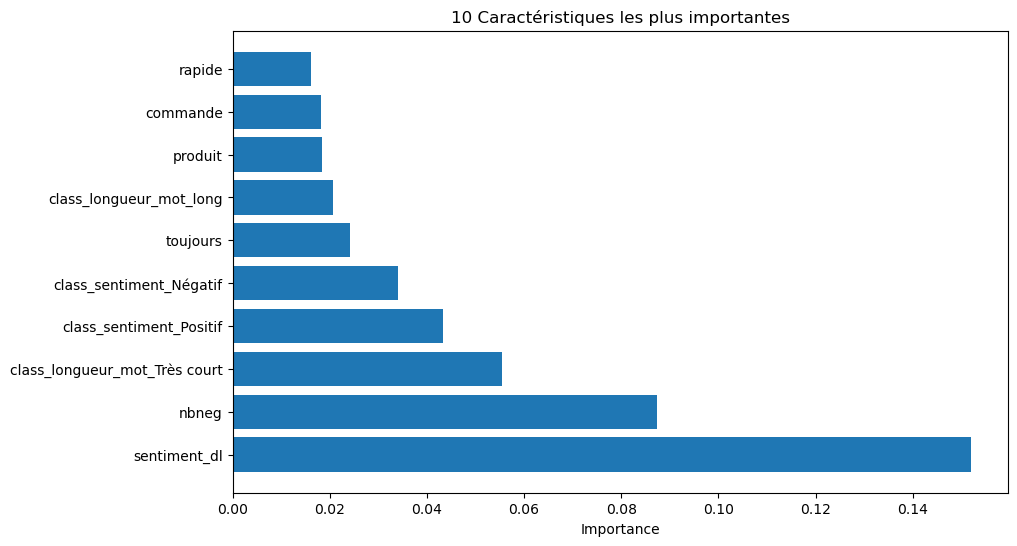

In [ ]:
#9-Caracteristiques les plus importantes avec le modele Randomforest
import numpy as np
import matplotlib.pyplot as plt

# les caractéristiques
importances = model.feature_importances_

# Récupérer les noms des caractéristiques
feature_names = np.array(vectorizer.get_feature_names_out())  # Pour les caractéristiques textuelles
cat_feature_names = X_categorielle_encoded_train.columns  # Pour les caractéristiques catégorielles
num_feature_names = X_numerique_train.columns  # Pour les caractéristiques numériques

# liste des noms de caractéristiques 
combined_feature_names = np.concatenate([feature_names, cat_feature_names, num_feature_names])

# DataFrame pour l'importance des caractéristiques
feat_importances = pd.DataFrame({'Feature': combined_feature_names, 'Importance': importances})
feat_importances = feat_importances.sort_values(by='Importance', ascending=False)

# Afficher les 10 caractéristiques les plus importantes
plt.figure(figsize=(10, 6))
plt.barh(feat_importances['Feature'][:10], feat_importances['Importance'][:10])
plt.xlabel('Importance')
plt.title('10 Caractéristiques les plus importantes')
plt.show()


In [ ]:
#10 Interpretation pour le texte

# from lime import lime_text
# from lime.lime_text import LimeTextExplainer

# # Créer un explainer LIME
# explainer = LimeTextExplainer(class_names=le.classes_)




In [21]:
# Optimisation des hyperparamètres avec GridSearchCV pour le modele randomforest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='f1', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train_equilibre, y_train_equilibre)

print("Meilleurs hyperparamètres :", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Entraînement du modèle optimisé sur les données rééquilibrées
best_model.fit(X_train_equilibre, y_train_equilibre)

# Prédictions sur l'ensemble de validation
y_val_pred = best_model.predict(X_val_scaled)

# Évaluation du modèle
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

# Évaluation du modèle
print("Classification Report sur l'ensemble de validation:\n", classification_report(y_val, y_val_pred))
print("Accuracy sur l'ensemble de validation:", accuracy_score(y_val, y_val_pred))
cmsm = pd.crosstab(y_val, y_val_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
display(cmsm)
print("----------------------------")

Fitting 5 folds for each of 108 candidates, totalling 540 fits


c:\Users\magal\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Meilleurs hyperparamètres : {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
[[ 154    1    3    5   90]
 [  31    2    3    6   34]
 [  14    1    8   17   96]
 [  12    1    7   49  358]
 [  10    0    3   45 2406]]
              precision    recall  f1-score   support

           1       0.70      0.61      0.65       253
           2       0.40      0.03      0.05        76
           3       0.33      0.06      0.10       136
           4       0.40      0.11      0.18       427
           5       0.81      0.98      0.88      2464

    accuracy                           0.78      3356
   macro avg       0.53      0.36      0.37      3356
weighted avg       0.72      0.78      0.73      3356

Classification Report sur l'ensemble de validation:
               precision    recall  f1-score   support

           1       0.70      0.61      0.65       253
           2       0.40      0.03      0.05        76
           3       0.33      0.06      

Classe prédite,1,2,3,4,5
Classe réelle,,,,,
1,154,1,3,5,90
2,31,2,3,6,34
3,14,1,8,17,96
4,12,1,7,49,358
5,10,0,3,45,2406


----------------------------


In [ ]:
# 6-Validation croisée LightGBM

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(random_search, X_train_equilibre, y_train_equilibre, cv=5, scoring='accuracy')

print("Scores de validation croisée : ", cv_scores)
print("Moyenne des scores de validation croisée : ", cv_scores.mean())

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.961461 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 343873
[LightGBM] [Info] Number of data points in the train set: 78868, number of used features: 6533
[LightGBM] [Info] Start training from score -1.609413
[LightGBM] [Info] Start training from score -1.609413
[LightGBM] [Info] Start training from score -1.609476
[LightGBM] [Info] Start training from score -1.609413
[LightGBM] [Info] Start training from score -1.609476
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [8]:
######################################################################################## partie test #####################################################################
# Récupération des indices de X_test pour faire le lien des 2 tables
indices_test2 = X_test.index

# Récupération des notes du client à partir du DataFrame original pour les indices de X_test
notes_clients102 = df.loc[indices_test, 'Note_client'].values
Lemmes102 = df.loc[indices_test, 'Lemmes'].values
nbre_phrases102=df.loc[indices_test, 'nbre_phrases'].values
Lemmes_titre_commentaire102 = df.loc[indices_test, 'Lemmes_titre_commentaire'].values
class_longueur_mot02=df.loc[indices_test, 'class_longueur_mot'].values
class_pt_exclam102 = df.loc[indices_test, 'class_pt_exclam'].values
class_sentiment102 = df.loc[indices_test, 'class_sentiment'].values
emoticones102=df.loc[indices_test, 'emoticones'].values
sentimentfr102 = df.loc[indices_test, 'sentimentfr'].values
sentimentdl102 = df.loc[indices_test, 'sentiment_dl'].values
nbneg102 = df.loc[indices_test, 'nbneg'].values
negatif102 = df.loc[indices_test, 'negatif'].values


df_test_results102 = pd.DataFrame({
    'Index': indices_test,
    'classe reelle': y_test,
    'Classe prédite': y_test_pred,
    'Note_Client_Original': notes_clients102,
    'Lemmes': Lemmes102,
    'Lemmes_titre_commentaire': Lemmes_titre_commentaire102,
    'Nombre_de_phrases': nbre_phrases102,
    'Classe_longueur_mot': class_longueur_mot02,
    'Classe_pt_exclam': class_pt_exclam102,
    'Classe_sentiment': class_sentiment102,
    'Emoticones': emoticones102,
    'Sentimentfr': sentimentfr102,
    "nombre neg": nbneg102,
    "negatif": negatif102,
    "sentiment":sentimentdl102 
})

for column in X_test.columns:
    df_test_results10[column] = X_test[column].values

# Réinitialisation de l'index pour un affichage plus propre
df_test_results102.reset_index(drop=True, inplace=True)


display(df_test_results102.head())


,Index,classe reelle,Classe prédite,Note_Client_Original,Lemmes,Lemmes_titre_commentaire,Nombre_de_phrases,Classe_longueur_mot,Classe_pt_exclam,Classe_sentiment,Emoticones,Sentimentfr,nombre neg,negatif,sentiment
0,7506,2,2,2,"['matériel', 'conforme', 'commande', 'service'...",[],1,Court,E0,Positif,Neutre,0.328000,0,0,5
1,27833,1,1,1,"['voil', 'bient', 'mois', 'commandé', 'apple',...","['deuxi', 'commande', 'toujours', 'colis']",4,long,E3,Positif,Neutre,0.029792,1,1,1
2,31923,1,1,1,"['achat', 'effectué', 'jours', 'livraison', 'p...",['éviter'],5,long,E1,Négatif,Neutre,-0.050000,0,0,1
3,11723,2,2,2,"['procédure', 'remplacement', 'identique', 'pu...","['procédure', 'remplacement']",1,long,E0,Neutre,Neutre,0.000000,0,0,3
4,4348,2,2,2,"['site', 'clair', 'données', 'compl', 'achat',...","['site', 'clair', 'données', 'compl', 'pour']",1,moyen,E0,Positif,Neutre,0.270000,0,0,5


In [71]:
# #analyse des erreurs----pb avec l 'index du df

# # DataFrame avec les valeurs réelles et prédites
# results_df = pd.DataFrame({
#     'Classe réelle': y_test,
#     'Classe prédite': y_test_pred
# })

# # Ajouter une colonne d'index pour pouvoir joindre avec le DataFrame d'origine
# results_df = results_df.reset_index()

#  #Filtrer les erreurs de prédiction
# errors_df = results_df[results_df['Classe réelle'] != results_df['Classe prédite']]

# # Afficher les lignes avec des erreurs de prédiction
# print("Lignes avec des erreurs de prédiction :")
# print(errors_df)

# # Ajouter une colonne d'index pour pouvoir joindre avec le DataFrame d'origine
# #errors_df = errors_df.reset_index()

# # Merge avec le DataFrame d'origine en utilisant l'index 

# errors_full_df = errors_df.merge(df, left_on='index', right_index=True, suffixes=('_erreur', '_original'))

# # Afficher les lignes avec des erreurs de prédiction complétées par les données d'origine
# print("Lignes avec des erreurs de prédiction :")
# display(errors_full_df)


# # Export de la nouvelle base etape3
# #errors_full_df.to_csv(r"C:\Users\magal\Documents\Documents Magali\Formations\Formation machine learing\DataScientist\projet\code\errors.csv", index=False)
# errors_full_df.to_csv(r"C:\Users\magal\Documents\Documents Magali\Formations\Formation machine learing\DataScientist\projet\code\errors.csv", sep=';', index=False, encoding='utf-8-sig')


Analyse des erreurs :
      Réel  Prédiction  Erreur
23       2           1    True
36       1           2    True
74       1           2    True
75       1           2    True
81       1           2    True
...    ...         ...     ...
3210     2           1    True
3263     1           2    True
3302     2           1    True
3349     1           2    True
3354     1           2    True

[126 rows x 3 columns]


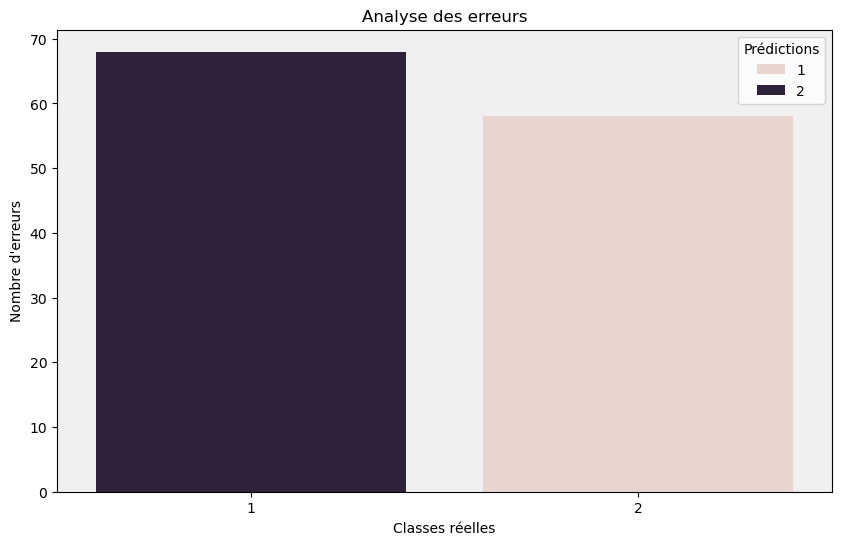

In [11]:
#7-########################################################################################### graph des erreurs ################################################################


# Analyse des erreurs
errors = pd.DataFrame({'Réel': y_test, 'Prédiction': y_test_pred})
errors['Erreur'] = errors['Réel'] != errors['Prédiction']
error_analysis = errors[errors['Erreur']]

print("Analyse des erreurs :")
print(error_analysis)

import matplotlib.pyplot as plt
import seaborn as sns



# Representation graphique des erreurs
plt.figure(figsize=(10, 6))
sns.countplot(x='Réel', hue='Prédiction', data=error_analysis)
# Ajouter un fond gris clair
plt.gca().set_facecolor('#f0f0f0')
plt.title("Analyse des erreurs")
plt.xlabel("Classes réelles")
plt.ylabel("Nombre d'erreurs")
plt.legend(title='Prédictions')
plt.show()

In [1]:

# column_names = X_categorielle_encoded_train.columns.tolist() + X_numerique_train.columns.tolist()

# print(column_names)

# column_names_equilibre=("Nombre_avis_client","Note_client","Lemmes","Lemmes_titre_commentaire","class_nbavis","nbre_phrases",
# "class_longueur_mot","class_pt_exclam","class_sentiment","emoticones")

# # column_names_equilibre=("Nombre_avis_client","Note_client","Lemmes","Lemmes_titre_commentaire","class_nbavis","nbre_mots","nbre_phrases",
# # "class_longueur_mot","class_pt_exclam","class_sentiment","emoticones","sentimentfr","Nombre_Émoticônes")
# # Convertir la matrice csr_matrix en DataFrame
# # Remplacez `column_names_equilibre` par la liste des noms de colonnes qui correspondent à X_train_equilibre
# X_train_df = pd.DataFrame(X_train_equilibre.toarray(), columns=column_names_equilibre)


# # X_var=X_train_equilibre.drop(["Lemmes","Lemmes_titre_commentaire"],axis=1)
# # # # Créer un DataFrame à partir de X_train_equilibre
# # X_train_var_df = pd.DataFrame(X_var, columns=column_names)

# # # Afficher les premières lignes du DataFrame pour vérifier
# print(X_train_df.head())

In [2]:
# # Importation des bibliothèques nécessaires
# from sklearn.ensemble import RandomForestRegressor
# import shap

# from scipy.sparse import csr_matrix

# # Convertir la csr_matrix en DataFrame
# dfm = pd.DataFrame(X_train_equilibre.toarray())

# # # Entraînement du modèle Random Forest
# # model = RandomForestRegressor(random_state=42)
# # model.fit(X_train_equilibre, y_train_equilibre)

# # Préparation de l'explainer SHAP
# explainer = shap.TreeExplainer(model)

# # Calcul des valeurs SHAP pour l'ensemble de validation
# shap_values = explainer.shap_values(X_val_scaled)

# # Visualisation des valeurs SHAP
# shap.summary_plot(shap_values, X_val_scaled, X_categorielle_encoded_val.columns.tolist() + X_numerique_val.columns.tolist())


In [15]:
# #Application d'un modèle de classification RandomForestClassifier 
# # cherche les parametre manuellement

# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, accuracy_score

# # Initialiser le modèle
# #model = RandomForestClassifier(random_state=42)
# model = RandomForestClassifier(n_estimators=50,  # Nombre d'arbres
#                                max_depth=5,     # Profondeur maximale des arbres
#                                min_samples_split=15,  # Nombre minimum d'échantillons requis pour diviser un nœud
#                                min_samples_leaf=10,   # Nombre minimum d'échantillons dans une feuille
#                                random_state=42)

# # Entraînement du modèle
# model.fit(X_train, y_train)

# # Prédictions sur l'ensemble du test
# y_test_pred = model.predict(X_test)

# # Prédictions sur l'ensemble de validation


# # Évaluation du modèle
# print("Classification Report sur l'ensemble de test:\n", classification_report(y_test, y_test_pred))
# print("Accuracy sur l'ensemble de test:", accuracy_score(y_test, y_test_pred))
# cmsm = pd.crosstab(y_test, y_test_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
# display(cmsm)
# print("----------------------------")

# # print("Classification Report sur l'ensemble de validation:\n", classification_report(y_val, y_val_pred))
# # print("Accuracy sur l'ensemble de validation:", accuracy_score(y_val, y_val_pred))

Classification Report sur l'ensemble de test:
               precision    recall  f1-score   support

           0       0.61      0.70      0.65      2465
           1       0.72      0.47      0.56      2464
           2       0.60      0.39      0.47      2465
           3       0.54      0.17      0.26      2465
           4       0.42      0.94      0.58      2465

    accuracy                           0.53     12324
   macro avg       0.58      0.53      0.51     12324
weighted avg       0.58      0.53      0.51     12324

Accuracy sur l'ensemble de test: 0.5345666991236612


Classe prédite,0,1,2,3,4
Classe réelle,,,,,
0,1727,155,140,16,427
1,549,1146,209,75,485
2,397,212,973,183,700
3,131,70,286,417,1561
4,27,10,25,78,2325


----------------------------


In [11]:
#analyse des erreurs

# DataFrame avec les valeurs réelles et prédites
results_df = pd.DataFrame({
    'Classe réelle': y_test,
    'Classe prédite': y_test_pred
})

 #Filtrer les erreurs de prédiction
errors_df = results_df[results_df['Classe réelle'] != results_df['Classe prédite']]

# Afficher les lignes avec des erreurs de prédiction
print("Lignes avec des erreurs de prédiction :")
print(errors_df)

# Ajouter une colonne d'index pour pouvoir joindre avec le DataFrame d'origine
errors_df = errors_df.reset_index()

# Joindre avec le DataFrame d'origine en utilisant l'index ou une clé unique
# Assumons que original_df a un index qui correspond à celui de results_df
# Si ce n'est pas le cas, vous devrez utiliser une colonne clé appropriée.
errors_full_df = errors_df.merge(df, left_on='index', right_index=True, suffixes=('_erreur', '_original'))

# Afficher les lignes avec des erreurs de prédiction complétées par les données d'origine
print("Lignes avec des erreurs de prédiction :")
display(errors_full_df)

Lignes avec des erreurs de prédiction :
        Classe réelle  Classe prédite
29962               3               4
120797              3               4
59420               1               0
27283               4               3
103355              3               4
...               ...             ...
17621               3               4
21988               3               4
31018               4               0
29048               4               3
6837                3               4

[308 rows x 2 columns]
Lignes avec des erreurs de prédiction :


,index,Classe réelle,Classe prédite,Nombre_avis_client,Note_client,Lemmes,Lemmes_titre_commentaire,class_nbavis,nbre_mots,nbre_phrases,class_longueur_mot,class_pt_exclam,class_sentiment,emoticones,sentimentfr,Nombre_Émoticônes
0,29962,3,4,8,3,"['contente', 'achat']","['contente', 'achat']",4-123,4,1,Très court,E0,Positif,Neutre,0.650000,0
3,27283,4,3,1,4,"['satisfait', 'seul', 'point', 'negatif', 'pro...",['satisfait'],1,29,2,moyen,E0,Positif,Neutre,0.083333,0
5,8707,3,4,1,3,"['produit', 'conforme', 'commande', 'expédié',...","['délai', 'expédition', 'respecté']",1,12,2,Court,E0,Positif,Neutre,0.100000,0
6,21884,3,4,9,3,"['produits', 'livrés', 'conform', 'conformes',...","['produits', 'livrés', 'conform', 'conformes']",4-123,46,2,long,E0,Positif,Neutre,0.088500,0
8,21358,4,3,3,4,"['colis', 'rapidement', 'martinique', 'petite'...","['colis', 'rapidement', 'martinique']",2-3,35,4,moyen,E0,Positif,Neutre,0.040000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,17621,3,4,1,3,"['vraiment', 'nickel']",['nickel'],1,3,1,Très court,E1,Neutre,Neutre,0.000000,0
304,21988,3,4,2,3,"['satisfaite', 'materiel', 'souci', 'transport...","['satisfaite', 'materiel']",2-3,31,3,moyen,E0,Positif,Neutre,0.480000,0
305,31018,4,0,1,4,"['fonctionné', 'comme', 'prévu', 'retour', 'fa...","['bonne', 'reprise', 'microsoft', 'surface', '...",1,62,2,long,E0,Positif,Neutre,0.098333,0
306,29048,4,3,5,4,"['attractif', 'bien', 'emballé', 'contre', 'po...","['attractif', 'bien', 'emballé']",4-123,29,1,moyen,E0,Positif,Neutre,0.143125,0
